# Hierarchical Clustering

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
airlines = pd.read_csv("EastWestAirlines.csv")

In [3]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Normalization function
def norm_func(i):
    x = (i - i.min())/(i.max() - i.min())
    return x

In [5]:
# Normalized dataframe (considering the numerical part of data)
df_norm = norm_func(airlines.iloc[:,1:])

In [6]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


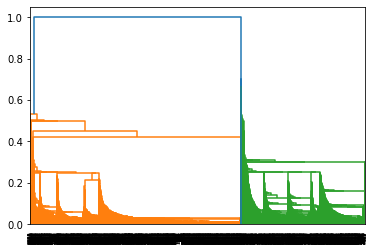

In [7]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))

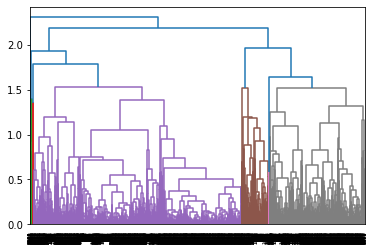

In [9]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [13]:
??AgglomerativeClustering

In [14]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [15]:
hc.fit_predict(df_norm)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
y_hc = hc.fit_predict(df_norm)

In [17]:
airlines['h_clusterid'] = y_hc

In [18]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [19]:
airlines.groupby(["h_clusterid"])["ID"].apply(lambda x:tuple(x))

h_clusterid
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
2                                              (3606,)
3                                              (2862,)
4                                               (915,)
Name: ID, dtype: object

In [21]:
airlines[airlines["ID"].isin([5, 8, 9, 10, 12, 16])]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1


# Another method of Hc

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [23]:
??pdist

In [24]:
xdist = pdist(df_norm,metric="euclidean")

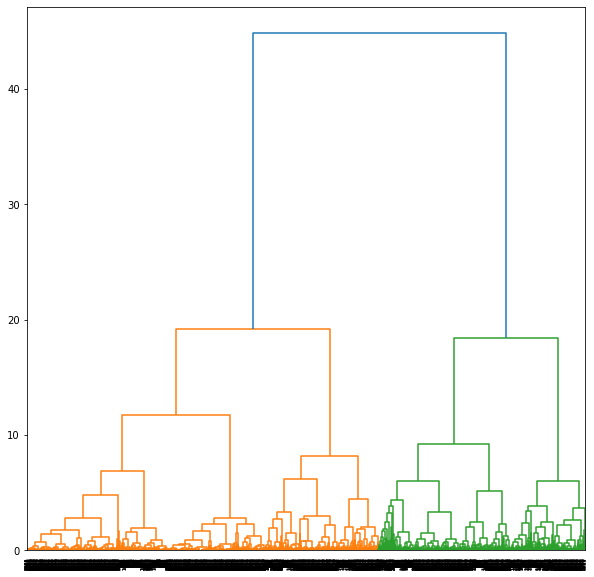

In [26]:
linked = linkage(xdist, 'ward')

plt.figure(figsize=(10,10))
dendrogram(linked,orientation='top',distance_sort='descending',
          show_leaf_counts=True)
plt.show()

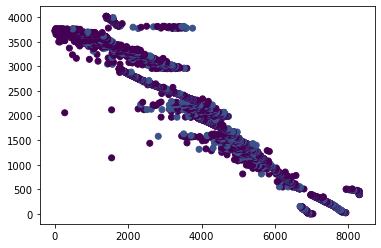

In [38]:
plt.scatter(airlines.iloc[:,-3],airlines.iloc[:,0],c=y_hc)

# KMeans Clsuter

In [39]:
from sklearn.cluster import KMeans

In [41]:
model_kmeans = KMeans(n_clusters = 5)
airlines_scaled = model_kmeans.fit(df_norm)

In [42]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 4, 4])

In [43]:
md = pd.Series(model_kmeans.labels_)

In [46]:
airlines["labels"] = pd.Series(model_kmeans.labels_)

In [47]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4,4


In [48]:
airlines.groupby(["labels"])["ID"].apply(lambda x:tuple(x))

labels
0    (5, 9, 10, 12, 16, 17, 19, 20, 21, 29, 36, 39,...
1    (1, 2, 3, 4, 6, 11, 13, 14, 15, 23, 24, 25, 26...
2    (8, 18, 22, 30, 37, 40, 43, 46, 48, 54, 58, 83...
3    (7, 31, 33, 45, 57, 59, 61, 68, 73, 74, 76, 78...
4    (1141, 1445, 1564, 1567, 1568, 1569, 1586, 196...
Name: ID, dtype: object

In [49]:
model_kmeans.cluster_centers_

array([[ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01, -3.88578059e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.88578059e-16],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
  

# Inferences

In [51]:
airlines.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award', 'h_clusterid', 'labels'],
      dtype='object')

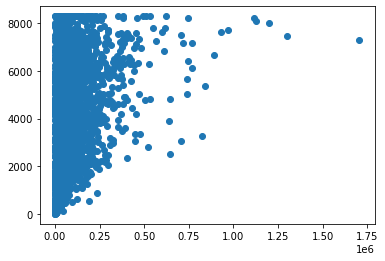

In [52]:
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],cmap=plt.cm.Accent)

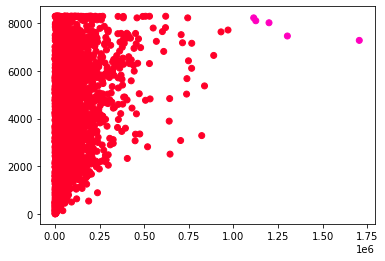

In [53]:
#using Hierarchical
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage = "complete")
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],c=cluster.fit_predict(airlines.iloc[:,[1,-4]]),cmap=plt.cm.gist_rainbow)

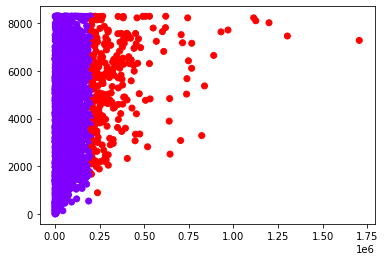

In [56]:
#using kmeans
model = KMeans(n_clusters = 2, max_iter=600, algorithm = 'auto')
model.fit(airlines.iloc[:,[1,-4]])
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],c=model.labels_,cmap=plt.cm.rainbow)

In [57]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

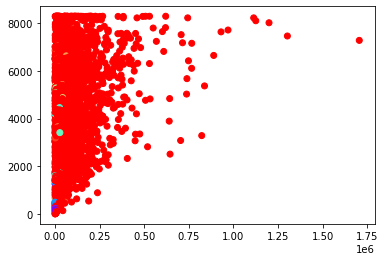

In [58]:
#DBSCAN
dbs=DBSCAN(min_samples=2,eps=0.2)
claas_pr=dbs.fit_predict(airlines.iloc[:,1:5])
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],c=claas_pr,cmap=plt.cm.rainbow_r)

# Finding the optimal number of clusters

In [59]:
data = pd.read_csv("EastWestAirlines.csv")

In [60]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [65]:
nc = [1,2,3,4,5,6,7,8,9]
iner = []
for i  in nc:
    km=KMeans(i)
    km.fit(data.iloc[:,[1,-2]])
    iner.append(km.inertia_)

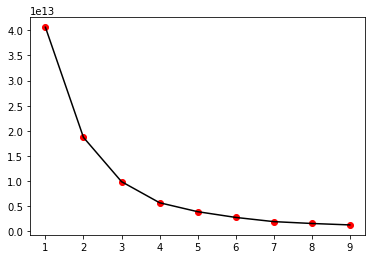

In [66]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# Silhouette_Score

In [75]:
from sklearn.metrics import silhouette_score as sil

In [77]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(data.iloc[:,[1,-2]])
    sc_score.append(sil(data.iloc[:,[1,-2]],y))

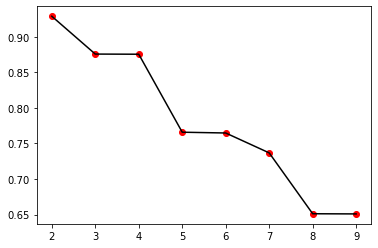

In [78]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()